In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../data/plant.csv')

In [12]:
#print(df)

## 二元配置分散分析

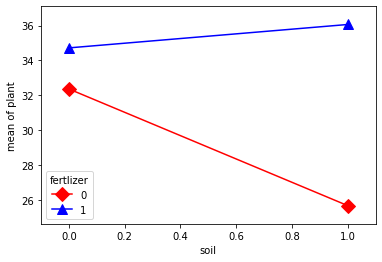

In [3]:
 from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(df.soil, df.fertlizer, df.plant, colors=['red','blue'], markers=['D','^'], ms=10)

In [5]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'plant ~ C(fertlizer) + C(soil) + C(fertlizer):C(soil)'
model = ols(formula, data=df).fit()
aov_table = anova_lm(model, typ=2)
aov_table.columns = ["平方和","自由度","F値","p値"] #列名を日本語に差し替え
print(aov_table) #被験者間効果の検定結果を出力

                          平方和   自由度         F値            p値
C(fertlizer)          404.496   1.0  36.462068  6.175847e-07
C(soil)                71.289   1.0   6.426131  1.573349e-02
C(fertlizer):C(soil)  160.801   1.0  14.494919  5.270302e-04
Residual              399.370  36.0        NaN           NaN


## 重回帰によるt検定

In [11]:
import statsmodels.api as sm
lm_mod = sm.OLS.from_formula("plant ~ C(fertlizer) + C(soil) + C(fertlizer):C(soil)",data=df).fit()
lm_mod.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,32.3700,1.053,30.733,0.000,30.234,34.506
C(fertlizer)[T.1],2.3500,1.490,1.578,0.123,-0.671,5.371
C(soil)[T.1],-6.6800,1.490,-4.485,0.000,-9.701,-3.659
C(fertlizer)[T.1]:C(soil)[T.1],8.0200,2.107,3.807,0.001,3.748,12.292
